Import CSV and plot

C:\Users\Bertie Auricchio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


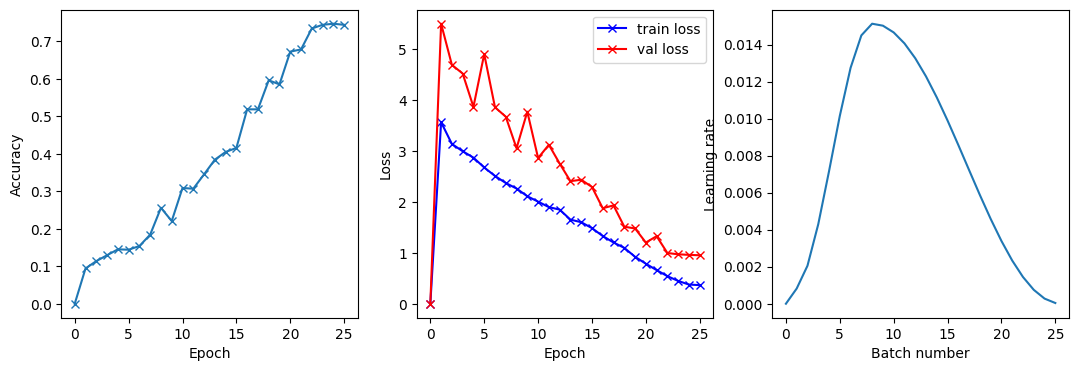

In [3]:
import pandas as pd
import processing


root = 'resnet_18_OneShot.csv'
history = pd.read_csv(root)
processing.plot_history(history)